In [7]:
'''
This file contains the code for creating and evaluating
the BERT model for sentiment analysis.
This file comes after the data_preprocessing file.
'''

'\nThis file contains the code for creating and evaluating\nthe BERT model for sentiment analysis.\nThis file comes after the data_preprocessing file.\n'

In [8]:
#pip install transformers torch

In [9]:
# import the cleaned data from data_preprocessing file
import pandas as pd
df = pd.read_pickle("dataframe.pkl")


In [10]:
# Load the tokenizer and model

#DistilBERT model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)


#BERT model
# from transformers import BertTokenizer, BertForSequenceClassification


#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

C:\Users\Alan\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


C:\Users\Alan\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Alan\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
from transformers import pipeline

# Initialize the pipeline for sentiment analysis
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


In [13]:
# Making predictions
df['sentiment'] = df['cleaned_text'].apply(lambda x: nlp(x)[0]['label'])


In [14]:
import pickle
df.to_pickle("dataframe_DistilBert.pkl")

In [1]:
import pandas as pd
df = pd.read_pickle("dataframe_DistilBert.pkl")

In [6]:
type(df['sentiment'][0])
df

,Unnamed: 0,hashed_userid,masked_username,location,following,followers,totaltweets,usercreateddt,tweetid,retweetcount,...,is_quote_status,quoted_status_id,extractedts,cleaned_text,preprocessed_text,text_with_emojis,text_with_slang,text_with_negations,sentiment_score,sentiment
tweetcreatedts,,,,,,,,,,,,,,,,,,,,,
2022-07-01 06:53:25,0,13028308852725196659,*****roy1,NaN,9590,8725,29317,2012-01-24,1542763288815030273,8,...,False,0,2022-07-01 12:03:31.185425,for 49 years libertys torch shone to ensure ba...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,0,LABEL_1
2022-07-01 06:53:32,1,45494576030177085457,******eam_6,NaN,8874,10090,33053,2019-02-07,1542763315926994945,8,...,False,0,2022-07-01 12:03:31.171429,for 49 years libertys torch shone to ensure ba...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,0,LABEL_1
2022-07-01 06:53:35,2,23641094384211702614,******erlin,"Los Angeles, CA",7730,10006,35360,2008-08-07,1542763330670014464,8,...,False,0,2022-07-01 12:03:31.157331,for 49 years libertys torch shone to ensure ba...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,0,LABEL_1
2022-07-01 06:53:38,3,21587659761682762378,******oshi23,Mumbai,232,132,4970,2016-05-10,1542763339738382337,254,...,False,0,2022-07-01 12:03:31.123276,home based church are now everywhere in punjab...,home base church everywher punjab haryana even...,home base church everywher punjab haryana even...,home base church everywher punjab haryana even...,home base church everywher punjab haryana even...,0,LABEL_1
2022-07-01 06:53:40,4,47915146590553055505,******4Truth,NaN,6914,6310,49958,2021-04-02,1542763352279003136,8,...,False,0,2022-07-01 12:03:31.097582,for 49 years libertys torch shone to ensure ba...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,49 year liberti torch shone ensur basic human ...,0,LABEL_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-20 02:55:19,415367,83242079331442835051,*******tresist,NaN,257,758,272531,2017-02-16,1560822761706094592,6,...,False,0,2022-08-20 02:58:51.096736,15 sandytxresister crystal4whales vtfishgirl1 ...,15 sandytxresist crystal4whal vtfishgirl1 mary...,15 sandytxresist crystal4whal vtfishgirl1 mary...,15 sandytxresist crystal4whal vtfishgirl1 mary...,15 sandytxresist crystal4whal vtfishgirl1 mary...,0,LABEL_1
2022-08-20 02:55:52,415368,98949018742144878760,*****ll42,NaN,603,179,59766,2014-03-14,1560822898780213249,2,...,False,0,2022-08-20 02:58:51.087505,aaronparnas patryanuc no to against every sing...,aaronparna patryanuc everi singl republican,aaronparna patryanuc everi singl republican,aaronparna patryanuc everi singl republican,aaronparna patryanuc everi singl republican,0,LABEL_1
2022-08-20 02:56:52,415369,42256911176251501556,*******eDuster,Chi-town,416,8852,11699,2009-03-26,1560823151671488513,1,...,False,0,2022-08-20 02:58:51.077181,the 19th amendment was ratified in 1920 granti...,19th amend ratifi 1920 grant women right vote ...,19th amend ratifi 1920 grant women right vote ...,19th amend ratifi 1920 grant women right vote ...,19th amend ratifi 1920 grant women right vote ...,0,LABEL_1


In [7]:
df.drop(['preprocessed_text', 'text_with_emojis','text_with_slang', 'text_with_negations','sentiment_score' ], axis=1, inplace=True)

In [8]:
df

,Unnamed: 0,hashed_userid,masked_username,location,following,followers,totaltweets,usercreateddt,tweetid,retweetcount,...,language,favorite_count,is_retweet,original_tweet_id,in_reply_to_status_id,is_quote_status,quoted_status_id,extractedts,cleaned_text,sentiment
tweetcreatedts,,,,,,,,,,,,,,,,,,,,,
2022-07-01 06:53:25,0,13028308852725196659,*****roy1,NaN,9590,8725,29317,2012-01-24,1542763288815030273,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.185425,for 49 years libertys torch shone to ensure ba...,LABEL_1
2022-07-01 06:53:32,1,45494576030177085457,******eam_6,NaN,8874,10090,33053,2019-02-07,1542763315926994945,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.171429,for 49 years libertys torch shone to ensure ba...,LABEL_1
2022-07-01 06:53:35,2,23641094384211702614,******erlin,"Los Angeles, CA",7730,10006,35360,2008-08-07,1542763330670014464,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.157331,for 49 years libertys torch shone to ensure ba...,LABEL_1
2022-07-01 06:53:38,3,21587659761682762378,******oshi23,Mumbai,232,132,4970,2016-05-10,1542763339738382337,254,...,en,0,True,1542707138971242496,0,False,0,2022-07-01 12:03:31.123276,home based church are now everywhere in punjab...,LABEL_1
2022-07-01 06:53:40,4,47915146590553055505,******4Truth,NaN,6914,6310,49958,2021-04-02,1542763352279003136,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.097582,for 49 years libertys torch shone to ensure ba...,LABEL_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-20 02:55:19,415367,83242079331442835051,*******tresist,NaN,257,758,272531,2017-02-16,1560822761706094592,6,...,en,0,True,1560794896663203840,0,False,0,2022-08-20 02:58:51.096736,15 sandytxresister crystal4whales vtfishgirl1 ...,LABEL_1
2022-08-20 02:55:52,415368,98949018742144878760,*****ll42,NaN,603,179,59766,2014-03-14,1560822898780213249,2,...,en,0,True,1560750229720563712,0,False,0,2022-08-20 02:58:51.087505,aaronparnas patryanuc no to against every sing...,LABEL_1
2022-08-20 02:56:52,415369,42256911176251501556,*******eDuster,Chi-town,416,8852,11699,2009-03-26,1560823151671488513,1,...,en,0,True,1560280488488718336,0,False,0,2022-08-20 02:58:51.077181,the 19th amendment was ratified in 1920 granti...,LABEL_1


In [9]:
value_counts = df['sentiment'].value_counts()

print(value_counts) # Label 0 is negative (pro-choice), Label 1 is neutral, Label 2 is Positive (anti-abortion)?

sentiment
LABEL_1    388570
LABEL_2      2881
LABEL_0      1248
Name: count, dtype: int64


In [14]:
# grouping by Mode
mode_sentiment = df.groupby('hashed_userid')['sentiment'].agg(lambda x: x.mode()[0])
value_counts_mode = mode_sentiment.value_counts()
print(value_counts_mode)

sentiment
LABEL_1    192783
LABEL_2       920
LABEL_0       721
Name: count, dtype: int64


In [17]:
# grouping by Mean
label_mapping = {
    'LABEL_0': 0,
    'LABEL_1': 1,
    'LABEL_2': 2
}

df['sentiment_int'] = df['sentiment'].replace(label_mapping)
user_mean_sentiment = df.groupby('hashed_userid')['sentiment_int'].mean()

value_counts_mean = user_mean_sentiment.value_counts()
print(value_counts_mean)

sentiment_int
1.000000    190553
2.000000       915
0.000000       570
1.500000       400
1.333333       266
             ...  
1.181818         1
1.014085         1
0.989362         1
1.013158         1
0.953488         1
Name: count, Length: 185, dtype: int64


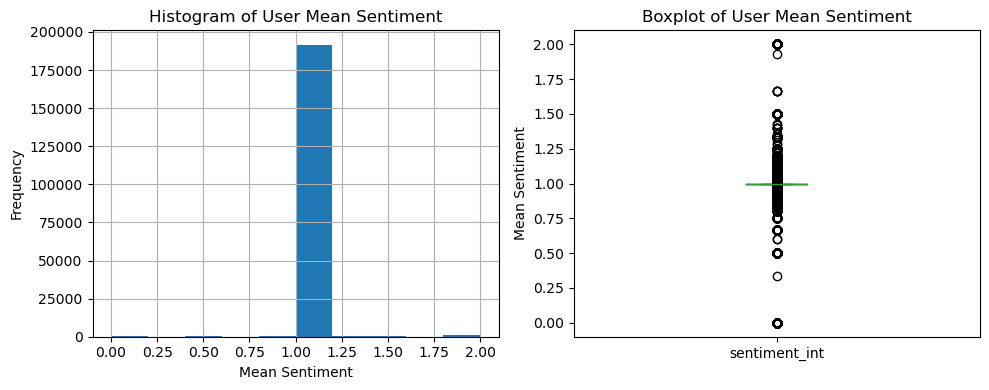

count    194424.000000
mean          1.003222
std           0.093380
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: sentiment_int, dtype: float64

In [18]:
# Summary of Mean grouping

import matplotlib.pyplot as plt

# Plotting the distribution as a histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
user_mean_sentiment.hist()
plt.title('Histogram of User Mean Sentiment')
plt.xlabel('Mean Sentiment')
plt.ylabel('Frequency')

# Plotting the distribution as a boxplot
plt.subplot(1, 2, 2)
user_mean_sentiment.plot.box()
plt.title('Boxplot of User Mean Sentiment')
plt.ylabel('Mean Sentiment')

# Showing the plots
plt.tight_layout()
plt.show()

# Printing summary statistics
user_mean_sentiment.describe()

In [22]:
filtered_df_2 = df[df['sentiment_int'] == 2]
filtered_df_2.to_csv("tweet_data_score2.csv")

In [23]:
filtered_df_1 = df[df['sentiment_int'] == 1]
filtered_df_1.to_csv("tweet_data_score1.csv")

In [24]:
filtered_df_0 = df[df['sentiment_int'] == 0]
filtered_df_0.to_csv("tweet_data_score0.csv")